## Import Libraries

In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
import matplotlib.pyplot as plt
import pickle
import sys

## Learn Module

In [2]:
def qdaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmats - A list of k d x d learnt covariance matrices for each of the k classes
    # IMPLEMENT THIS METHOD
    Xp=np.concatenate((y, X), axis=1)
    means = np.zeros(shape=(Xp.shape[1], np.unique(y).size))
    covmats = np.zeros(shape=(np.unique(y).size,X.shape[1], X.shape[1]))
    for i in range(np.unique(y).size):
        means[:,i]=Xp[Xp[:,0] == np.unique(y)[i],:].mean(0)
        covmats[i]=np.cov(Xp[Xp[:,0] == np.unique(y)[i],1:].T)
    return means,covmats

## Test Module

In [3]:
def qdaTest(means,covmats,Xtest,ytest):
    # Inputs
    # means, covmats - parameters of the QDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels
    newmat = np.zeros(shape=(means.shape[1]))
    ypred = np.zeros(shape=(ytest.shape[0],1))
    for i in range(Xtest[:,0].size):
        for j in range(covmats.shape[0]):
            newmat[j] = np.dot(np.dot(((Xtest[i]).T-means[1:,j]).T,inv(covmats[j])),(Xtest[i].T-means[1:,j]))
        ypred[i] = means[0,np.where(newmat == newmat.min())]
    acc = np.sum(ypred == ytest)/ytest.shape[0]
    # IMPLEMENT THIS METHOD
    return acc,ypred

## Execute and Test

In [4]:
#Check for Python 2 or Python 3
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')

In [5]:
# QDA

means,covmats = qdaLearn(X,y)
qdaacc,qdares = qdaTest(means,covmats,Xtest,ytest)
print('QDA Accuracy = '+str(qdaacc))

QDA Accuracy = 0.94


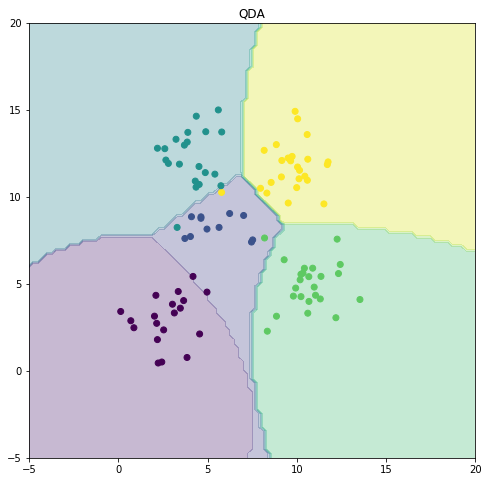

In [6]:
# plotting boundaries
x1 = np.linspace(-5,20,100)
x2 = np.linspace(-5,20,100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()

fig = plt.figure(figsize=[8,8])
# plt.subplot(1, 1, 1)  #If you want to split up the plot space and create more plots or add plots

zacc,zqdares = qdaTest(means,covmats,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zqdares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest)
plt.title('QDA')

plt.show()